# Corrida de bicicleta e o efeito da resistência do ar

Jeanlex Soares de Sousa (jeanlex@fisica.ufc.br) <br>
Departamento de Física <br>
Universidade Federal do Ceará

## Introdução

Numa corrida real de bicicleta, maior parte da energia é gasta para vencer a resistência do ar. Considerando-se o movimento em uma única dimensão, a equação do movimento a ser resolvida é:

$$m \frac{d^2 x}{d t^2} = F_R$$

onde $F_R$ é a força resultante. Na ausência da resistência do ar, $F_R = F_C$ é a força que o ciclista faz nos pedais que coloca o sistema (bicicleta + ciclista) em movimento. Se houver resistência do ar, $F_R = F_C - F_{ar}$, onde $F_{ar}$ é a força da resistência do ar. Iremos resolver este problema na ausência e na presença de $F_{ar}$. 

## Movimento sem resistência do ar

Assumindo $F_{ar} = 0$, é necessário uma forma explícita para $F_C$. Contudo, encontrar forma exata para descrever a força que um ciclista imprime no pedal é virtualmente impossível. A alternativa é formular o problema em termos da potência $P$ gasta pelo ciclista. A potência é dada por $P = \frac{d E}{d t}$. Se o ciclista andar em uma estrada plana, tem-se que $E = m v^2/2$. Tem-se então:

$$P = \frac{d E}{d t} = m v \frac{d v}{d t}$$

$$\frac{d v}{d t} = \frac{P}{m v}$$

Temos então uma equação diferencial para determinar a função $v(t)$, cuja solução exata é:

$$v(t) = \sqrt{v_0^2 + \frac{2 P t}{m}}$$

Note que, sem resistência do ar, a velocidade aumenta monotonicamente para o caso de potência constante. 

## Movimento com resistência do ar

A resistência do ar, conforme demonstrada no livro texto, possui a seguinte forma:

$$F_{ar} = \frac{C \rho A v^2}{2}$$

onde $C$ é um fator de ajuste a ser determinado por experimentos de túnel de vento, $\rho$ é a densidade do ar, $A$ é a área da secção reta do ciclista, e $v$ é a velocidade do ciclista. Aqui assume-se que a velocidade do ar é nula. Se não o fosse, $v$ seria a velocidade relativa do ar e do ciclista. Sendo assim, a equação diferencial que determina a velocidade do ciclista torna-se:

$$\frac{d v}{d t} = \frac{P}{m v} - \frac{C \rho A v^2}{2m}$$

## Solução numérica

A solução numérica das equações diferenciais acima, requer que a discretização da derivada $dv / dt$. Assumindo a derivada progressiva, tem-se:

$$\frac{d v}{dt} \approx \frac{v(t+\Delta t) - v(t)}{\Delta t}$$

Sendo assim, a forma discretizada das esquações diferenciais sem e com o efeito da resistência do ar tornam-se:

$$v_{i+1} = v_i + \frac{P}{m v_i} \Delta t$$

$$v_{i+1} = v_i + \frac{P}{m v_i} \Delta t - \frac{C \rho A v_i^2}{2m} \Delta t$$

## Código

O código abaixo resolve as equação diferencial do movimento da bicicleta e compara com a solução analítica sem a resistência do ar.




In [1]:
# loading libraries 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# assigning input variables

dt = 0.01          # time step increment
nt = 300          # number of time steps

Power = 400       # in W (Power)  
v0 = 0.5          # in m/s (initial velocity)
mass = 80         # in kg (combined mass of bike + biker)
rho = 1.225       # in kg/m^3 (air density)
C = 0.1           # aerodynamic parameter
A = 0.5           # in m^2 (area cross-section)

ct1 = Power/mass       # auxiliary constant
ct2 = C*rho*A/2*mass   # auxiliary constant

Tmax = (nt-1)*dt  # this is not an input variable
                  # it only calculates the total time 

In [6]:
# array of time steps t_i (nt points from 0 to Tmax)
time = np.linspace(0,Tmax,nt)

# theory without air resistance
theory1 = np.zeros(nt)
theory2 = np.zeros(nt)
for i in range(0,nt):theory1[i] = np.sqrt(v0**2 + 2*ct1*time[i])
for i in range(0,nt):theory2[i] = np.sqrt(v0**2 + (2*ct1-ct2)*time[i])

# numerical velocity without air resistance
veloc1 = np.zeros(nt)
veloc1[0] = v0

# numerical velocity with air resistance
veloc2 = np.zeros(nt)
veloc2[0] = v0

# iterating loop starting at second array position 
for i in range(1,nt):
    veloc1[i] = veloc1[i-1] + ct1*dt/veloc1[i-1]
    veloc2[i] = veloc2[i-1] + ct1*dt/veloc2[i-1] - ct2*dt*veloc2[i-1]**2

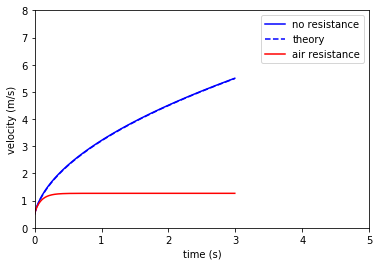

In [7]:
plt.plot(time, veloc1, '-b',time, theory1,'--b',time,veloc2,'r-')
plt.axis([0, 5, 0, 8])
plt.xlabel('time (s)')
plt.ylabel('velocity (m/s)')
plt.legend(['no resistance','theory','air resistance'])
plt.show()